In [122]:
#import all dependencies

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [123]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [134]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [125]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=True)

In [129]:
# reflect an existing database into a new model and declare a base using Automap_base()
Base = automap_base()


# reflect the tables
Base.prepare(engine, reflect=True)

2023-01-12 19:37:03,741 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2023-01-12 19:37:03,744 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-01-12 19:37:03,998 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("measurement")
2023-01-12 19:37:03,999 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-01-12 19:37:04,056 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2023-01-12 19:37:04,115 INFO sqlalchemy.engine.Engine [raw sql] ('measurement',)
2023-01-12 19:37:04,117 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("measurement")
2023-01-12 19:37:04,118 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-01-12 19:37:04,120 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("measurement")
2023-01-12 19:37:04,121 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-01-12 19:37:04,123 INFO sqlalchemy.engine.Engine SELECT sql

In [130]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [131]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [135]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Create the inspector to connect with the engine
inspector = inspect(engine)

In [136]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

2023-01-12 19:39:42,560 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("station")
2023-01-12 19:39:42,561 INFO sqlalchemy.engine.Engine [raw sql] ()
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [137]:
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

2023-01-12 19:40:05,148 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("measurement")
2023-01-12 19:40:05,150 INFO sqlalchemy.engine.Engine [raw sql] ()
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [138]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
recent_date

2023-01-12 19:41:11,881 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-01-12 19:41:12,985 INFO sqlalchemy.engine.Engine SELECT measurement.date AS measurement_date 
FROM measurement ORDER BY measurement.date DESC
 LIMIT ? OFFSET ?
2023-01-12 19:41:12,986 INFO sqlalchemy.engine.Engine [generated in 0.06258s] (1, 0)


'2017-08-23'

In [152]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
last_12_months = dt.date(2017, 8, 23) - dt.timedelta(days=364)
last_12_months

datetime.date(2016, 8, 24)

In [155]:
# Perform a query to retrieve the data and precipitation scores

year_precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23', Measurement.prcp != None).\
    order_by(Measurement.date).all()
year_precipitation

2023-01-12 19:59:34,729 INFO sqlalchemy.engine.Engine SELECT measurement.date AS measurement_date, measurement.prcp AS measurement_prcp 
FROM measurement 
WHERE measurement.date >= ? AND measurement.prcp IS NOT NULL ORDER BY measurement.date
2023-01-12 19:59:34,730 INFO sqlalchemy.engine.Engine [generated in 0.03704s] ('2016-08-23',)


[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [157]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

df = pd.DataFrame(year_precipitation, columns=['Date', 'Precipitation'])
df.set_index('Date', inplace=True)
df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


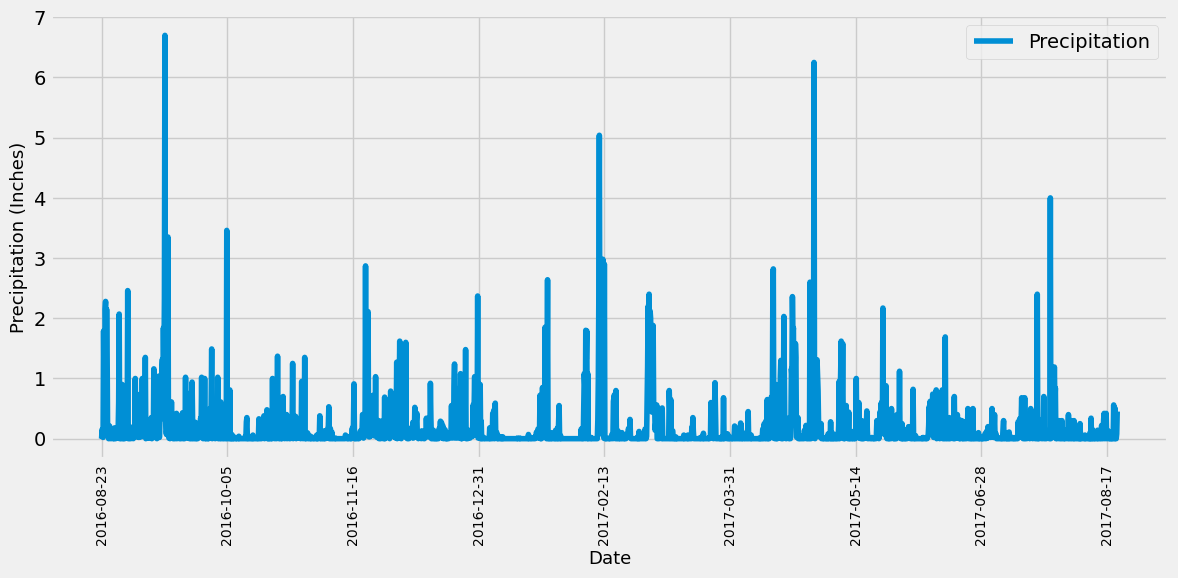

In [164]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(12,6))

#Set Labels
plt.xlabel('Date', fontsize=13)
plt.ylabel("Precipitation (Inches)", fontsize=13)

# Assign xticks to make it vertical
plt.xticks(rotation='vertical',fontsize=10)

plt.savefig("Precipitation_Plot.png")
plt.tight_layout()


In [165]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [166]:
# Design a query to calculate the total number stations in the dataset
session.query(Measurement.station).distinct().count()


2023-01-12 20:07:42,776 INFO sqlalchemy.engine.Engine SELECT count(*) AS count_1 
FROM (SELECT DISTINCT measurement.station AS measurement_station 
FROM measurement) AS anon_1
2023-01-12 20:07:42,778 INFO sqlalchemy.engine.Engine [generated in 0.00188s] ()


9

In [167]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
                               group_by(Measurement.station).\
                               order_by(func.count(Measurement.station).desc()).all()
active_stations

2023-01-12 20:07:52,266 INFO sqlalchemy.engine.Engine SELECT measurement.station AS measurement_station, count(measurement.station) AS count_1 
FROM measurement GROUP BY measurement.station ORDER BY count(measurement.station) DESC
2023-01-12 20:07:52,267 INFO sqlalchemy.engine.Engine [generated in 0.00117s] ()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [177]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# most_active_station = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
#                 filter(Measurement.station =="USC00519281" ).all()
# most_active_station

In [176]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
session.query(*sel).filter(Measurement.station == "USC00519281").all()

2023-01-12 20:51:44,104 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-01-12 20:51:44,128 INFO sqlalchemy.engine.Engine SELECT min(measurement.tobs) AS min_1, max(measurement.tobs) AS max_1, avg(measurement.tobs) AS avg_1 
FROM measurement 
WHERE measurement.station = ?
2023-01-12 20:51:44,129 INFO sqlalchemy.engine.Engine [generated in 0.00112s] ('USC00519281',)


[(54.0, 85.0, 71.66378066378067)]

In [173]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

year_temperature= session.query(Measurement.tobs).\
      filter(Measurement.date >= '2016-08-23', 
             Measurement.station == 'USC00519281').\
      order_by(Measurement.tobs).all()


tobs_df = pd.DataFrame(year_temperature, columns=['Tobs'])
tobs_df.head()


2023-01-12 20:12:08,298 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-01-12 20:12:08,301 INFO sqlalchemy.engine.Engine SELECT measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE measurement.date >= ? AND measurement.station = ? ORDER BY measurement.tobs
2023-01-12 20:12:08,303 INFO sqlalchemy.engine.Engine [generated in 0.00169s] ('2016-08-23', 'USC00519281')


,Tobs
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0


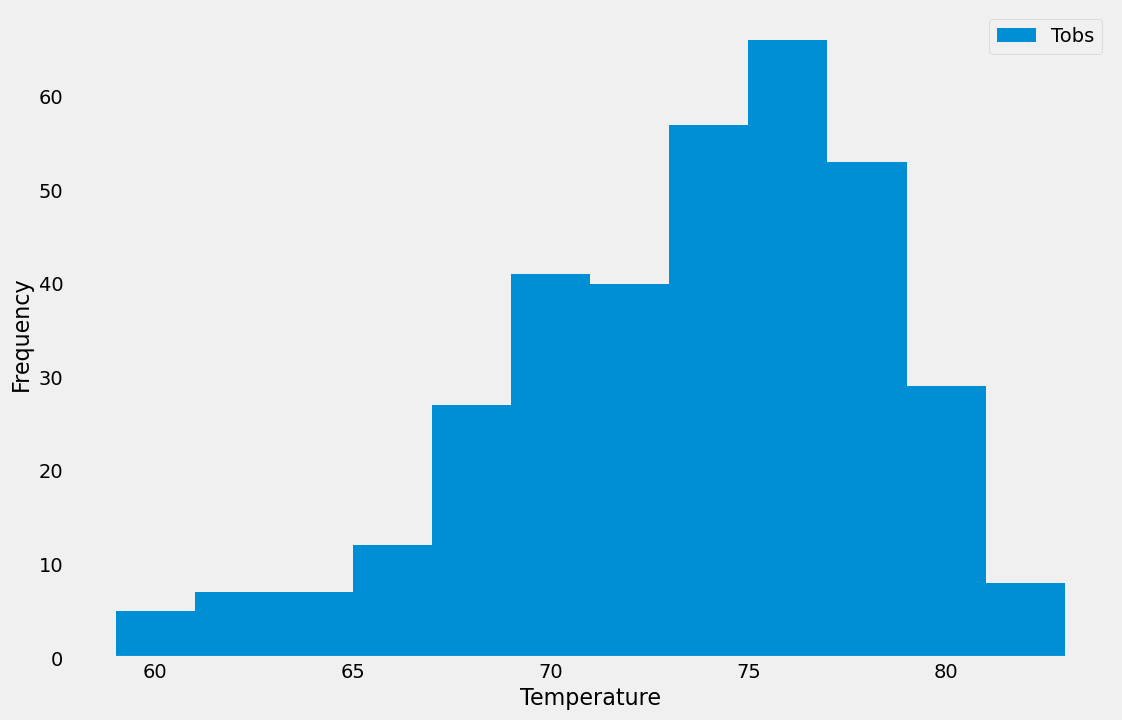

In [174]:
# Plot the histogram for 12-month period
tobs_df.plot.hist(bins=12, figsize=(12,8))

# Set Labels
plt.xlabel("Temperature", fontsize=16)
plt.ylabel("Frequency", fontsize=16)

plt.grid()
plt.show

# Save Figure
plt.savefig("station_Plot.png")

# Close session

In [175]:
# Close Session
session.close()

2023-01-12 20:12:16,765 INFO sqlalchemy.engine.Engine ROLLBACK
